<a href="https://colab.research.google.com/github/amikoshimrah/sothingshimrah/blob/main/Email_Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# read the data
df=pd.read_csv('/content/emails.csv')

In [ ]:
# Basic exploration
print(df.head())
print(df.info())
print(df['Prediction'].value_counts())

  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries

**Dataset Structure:**

The dataset has multiple numerical features extracted from emails and a binary target Prediction (0 = Not Spam, 1 = Spam).

In [ ]:
# 2. Preprocessing
# Remove unnecessary columns
df.drop(['Email No.'], axis=1, inplace=True)

In [ ]:
# Features and labels
# Remove rows where 'Prediction' is NaN
#df = df.dropna(subset=['Prediction'])
X = df.drop('Prediction', axis=1)
y = df['Prediction']

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 3. Building the Decision Tree
clf = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [ ]:
# 4. Model Evaluation
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8995169082125604
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       739
           1       0.81      0.84      0.83       296

    accuracy                           0.90      1035
   macro avg       0.87      0.88      0.88      1035
weighted avg       0.90      0.90      0.90      1035

Confusion Matrix:
 [[682  57]
 [ 47 249]]


**Overall Accuracy**

Accuracy: ~89.95%
→ About 90% of the test set emails are correctly classified as spam or not spam.

.

**Confusion Matrix Interpretation**

**True Negatives (TN): 682**
→ Legitimate emails correctly identified.

**False Positives (FP): 57**
→ Legitimate emails incorrectly marked as spam.

**False Negatives (FN): 47**
→ Spam emails missed and marked as not spam.

**True Positives (TP): 249**
→ Spam emails correctly identified.



**🎯 Precision & Recall**

**Class 0 (Not Spam):**

**Precision:** 0.94 → When the model predicts “not spam,” it's correct 94% of the time.

**Recall:** 0.92 → It successfully catches 92% of all actual “not spam” emails.

**Class 1 (Spam):**

**Precision:** 0.81 → When it predicts “spam,” it's correct 81% of the time.

**Recall:** 0.84 → It detects 84% of actual spam emails.

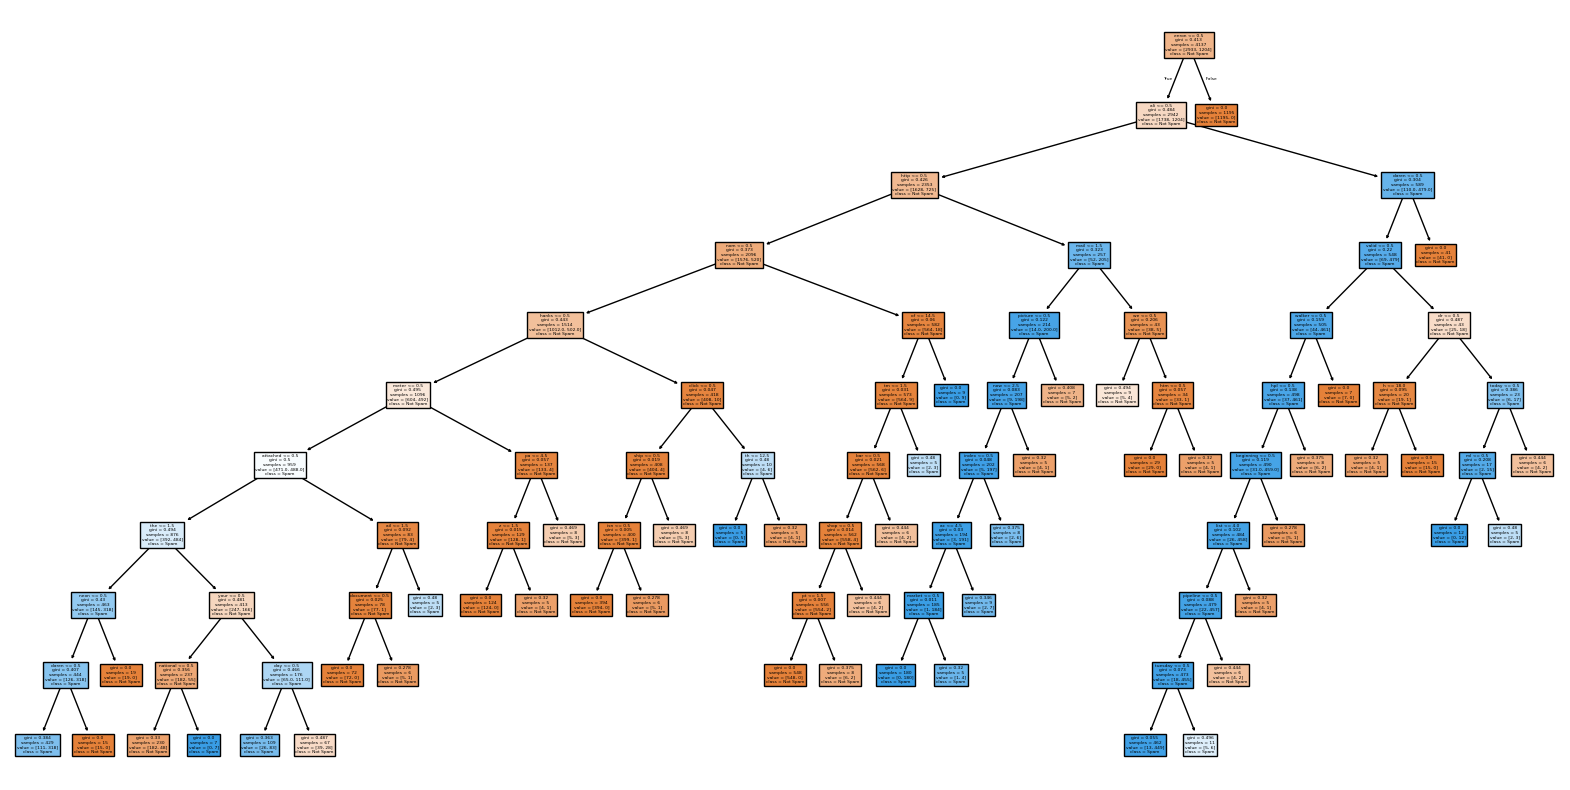

In [ ]:
# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Not Spam", "Spam"])
plt.show()

In [ ]:
# 5. Hyperparameter Tuning
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# Final model
best_clf = grid_search.best_estimator_
final_preds = best_clf.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, final_preds))

Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1}
Tuned Model Accuracy: 0.9227053140096618


**🔥 That’s a nice jump in performance — your tuned Decision Tree model now reaches ~92.27% accuracy, up from ~89.95%!**
